# Import library

In [1]:
import os
import shutil
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
import glob
import cv2

In [2]:
print(os.getcwd())

D:\Kuliah\Semester 6\PCD\Tugas Akhir\Sabil


In [11]:
print(os.listdir('D:\Kuliah\Semester 6\PCD\Tugas Akhir\Sabil\data'))

['Horse', 'Meat', 'Pork']


# Renaming img file

In [32]:
# Mengubah nama file agar seragam => Horse_index
horse_path = 'D:\Kuliah\Semester 6\PCD\Tugas Akhir\Sabil\dataset\Horse'
i = 0
# Iterasi melalui setiap file di dalam folder
for filename in os.listdir(horse_path):
    # Mendapatkan path lengkap dari file
    file_path = os.path.join(horse_path, filename)
    
    # Mendapatkan ekstensi file
    file_extension = os.path.splitext(filename)[1]
    
    # Membuat nama baru untuk file
    new_filename = 'Horse_'+ f'{i}' + file_extension
    i = i+1
    # Mengganti nama file
    os.rename(file_path, os.path.join(horse_path, new_filename))

In [33]:
# Mengubah nama file agar seragam => Meat_index
meat_path = 'D:\Kuliah\Semester 6\PCD\Tugas Akhir\Sabil\dataset\Meat'
i = 0
# Iterasi melalui setiap file di dalam folder
for filename in os.listdir(meat_path):
    # Mendapatkan path lengkap dari file
    file_path = os.path.join(meat_path, filename)
    
    # Mendapatkan ekstensi file
    file_extension = os.path.splitext(filename)[1]
    
    # Membuat nama baru untuk file
    new_filename = 'Meat_'+ f'{i}' + file_extension
    i = i+1
    # Mengganti nama file
    os.rename(file_path, os.path.join(meat_path, new_filename))

In [34]:
# Mengubah nama file agar seragam => Pork_index
pork_path = 'D:\Kuliah\Semester 6\PCD\Tugas Akhir\Sabil\dataset\Pork'
i = 0
# Iterasi melalui setiap file di dalam folder
for filename in os.listdir(pork_path):
    # Mendapatkan path lengkap dari file
    file_path = os.path.join(pork_path, filename)
    
    # Mendapatkan ekstensi file
    file_extension = os.path.splitext(filename)[1]
    
    # Membuat nama baru untuk file
    new_filename = 'Pork_'+ f'{i}' + file_extension
    i = i+1
    # Mengganti nama file
    os.rename(file_path, os.path.join(pork_path, new_filename))

# Split dataset

In [55]:
# Path folder yang berisi gambar
source_path = 'D:/Kuliah/Semester 6/PCD/Tugas Akhir/Sabil/dataset/datas'  
# Path folder untuk data train
train_path= 'D:/Kuliah/Semester 6/PCD/Tugas Akhir/Sabil/dataset/training'
# Path folder untuk data test
test_path = 'D:/Kuliah/Semester 6/PCD/Tugas Akhir/Sabil/dataset/testing'  
#split rasio
split = 0.8  # 0.8 berarti 80% train dan 20% test)

# Mengambil file pada path sumber
file = os.listdir(source_path)

# Random file
random.shuffle(file)

# Menghitung jumlah data untuk train dan test berdasarkan split ratio
train_count = int(len(file) * split_ratio)
test_count = len(file) - train_count

# Memindahkan gambar ke folder train dan test
for i, filename in enumerate(file):
    src_path = os.path.join(source_path, filename)
    if i < train_count:
        dst_path = os.path.join(train_path, filename)
    else:
        dst_path = os.path.join(test_path, filename)
    shutil.copy(src_path, dst_path)

print('Banyak data hasil split')
print('Jumlah data train:', train_count)
print('Jumlah data test:', test_count)

Data berhasil dibagi menjadi folder pelatihan dan pengujian.
Jumlah data pelatihan: 292
Jumlah data pengujian: 73


# Ekstraksi fitur RGB

In [56]:
#TRAINING IMAGE
#ekstrak fitur
train_img=[]     
for i in os.listdir(training_path):
    img=cv2.imread(os.path.join(training_path,i))  #gabungin setiap foto dari path training 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(240,240))   #resize semua gambarnya

    train_img.append(resized)
train_img = np.array(train_img)

#ekstrak label
train_label=[]
for i in os.listdir(training_path):
    if i.split("_")[0] == "Horse":
        train_label.append(0)
    elif i.split("_")[0] =="Meat":
        train_label.append(1)
    elif i.split("_")[0] == "Pork":
        train_label.append(2)
train_label = np.array(train_label)

In [57]:
print(train_img.shape)
print(train_label.shape)

(292, 240, 240, 3)
(292,)


In [58]:
#TESTING IMAGE
#ekstrak fitur
test_img=[]     
for i in os.listdir(testing_path):
    img=cv2.imread(os.path.join(testing_path,i))  #gabungin setiap foto dari path testing 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(240,240))   #resize semua gambarnya

    test_img.append(resized)
test_img = np.array(test_img)

#ekstrak label
test_label=[]
for i in os.listdir(testing_path):
    if i.split("_")[0] == "Horse":
        test_label.append(0)
    elif i.split("_")[0] =="Meat":
        test_label.append(1)
    elif i.split("_")[0] == "Pork":
        test_label.append(2)
test_label = np.array(test_label)

In [59]:
print(test_img.shape)
print(test_label.shape)

(73, 240, 240, 3)
(73,)


# Modelling

In [122]:
#Inisialisasi xtrain, xtest, ytrain, ytest
Xtrain, Xtest = train_img, test_img
Ytrain, Ytest = train_label, test_label

print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)


(292, 240, 240, 3) (73, 240, 240, 3) (292,) (73,)


In [62]:
#Reshape
Xtr = Xtrain.reshape(292,172800)
#Reshape
Xts = Xtest.reshape(73,172800)

In [68]:
#MODELING RF
from sklearn.ensemble import RandomForestClassifier
smodel=RandomForestClassifier(n_estimators = 100, random_state = 42)
smodel.fit(Xtr,Ytrain)

RandomForestClassifier(random_state=42)

In [69]:
#akurasinya rf
smodel.score(Xts,Ytest)

0.9315068493150684

In [81]:
urutan = 3
prediksi = smodel.predict(Xtest[urutan].reshape(1,-1))
if prediksi == 0:
    print("Horse")
elif prediksi == 1:
    print("Meat")
elif prediksi == 2:
    print("Pork")

Horse


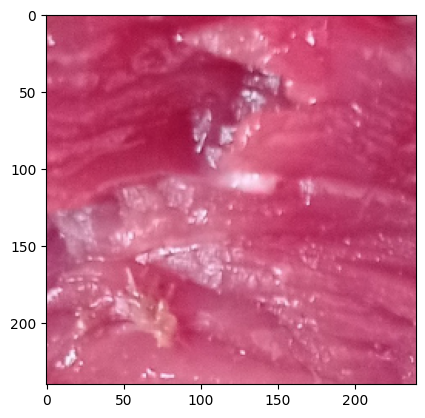

In [82]:
plt.imshow(Xtest[3])

In [83]:
from sklearn.model_selection import cross_val_score, train_test_split

# Evaluasi performa model menggunakan validasi silang
train_scores = cross_val_score(smodel, Xtr, Ytrain, cv=5)  # Ganti cv sesuai dengan jumlah fold yang diinginkan
test_scores = cross_val_score(smodel, Xts, Ytest, cv=5)

# Cetak skor rata-rata dari validasi silang
print("Train Accuracy:", train_scores.mean())
print("Test Accuracy:", test_scores.mean())

Train Accuracy: 0.8458211572180012
Test Accuracy: 0.9066666666666666


# Versi HSV

In [84]:
#TRAINING IMAGE
#ekstrak fitur
train_img=[]     
for i in os.listdir(training_path):
    img=cv2.imread(os.path.join(training_path,i))  #gabungin setiap foto dari path training 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    resized=cv2.resize(img,(240,240))   #resize semua gambarnya

    train_img.append(resized)
train_img = np.array(train_img)

#ekstrak label
train_label=[]
for i in os.listdir(training_path):
    if i.split("_")[0] == "Horse":
        train_label.append(0)
    elif i.split("_")[0] =="Meat":
        train_label.append(1)
    elif i.split("_")[0] == "Pork":
        train_label.append(2)
train_label = np.array(train_label)

In [85]:
#TESTING IMAGE
#ekstrak fitur
test_img=[]     
for i in os.listdir(testing_path):
    img=cv2.imread(os.path.join(testing_path,i))  #gabungin setiap foto dari path testing 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    resized=cv2.resize(img,(240,240))   #resize semua gambarnya

    test_img.append(resized)
test_img = np.array(test_img)

#ekstrak label
test_label=[]
for i in os.listdir(testing_path):
    if i.split("_")[0] == "Horse":
        test_label.append(0)
    elif i.split("_")[0] =="Meat":
        test_label.append(1)
    elif i.split("_")[0] == "Pork":
        test_label.append(2)
test_label = np.array(test_label)

In [86]:
#DATA SPLITING
Xtrain, Xtest = train_img, test_img
Ytrain, Ytest = train_label, test_label

print('Original Sizes:', Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)


Original Sizes: (292, 240, 240, 3) (73, 240, 240, 3) (292,) (73,)


In [87]:
#Reshape
Xtr = Xtrain.reshape(292,172800)
#Reshape
Xts = Xtest.reshape(73,172800)

In [88]:
#MODELING RF
from sklearn.ensemble import RandomForestClassifier
hsvmodel=RandomForestClassifier(n_estimators = 100, random_state = 42)
hsvmodel.fit(Xtr,Ytrain)

RandomForestClassifier(random_state=42)

In [89]:
#akurasinya rf
hsvmodel.score(Xts,Ytest)

0.9452054794520548

In [107]:
urutan = 3
prediksi = hsvmodel.predict(Xtest[urutan].reshape(1,-1))
if prediksi == 0:
    print("Horse")
elif prediksi == 1:
    print("Meat")
elif prediksi == 2:
    print("Pork")

Horse


In [110]:
from sklearn.model_selection import cross_val_score, train_test_split

# Evaluasi performa model menggunakan validasi silang
train_scores = cross_val_score(hsvmodel, Xtr, Ytrain, cv=5)  # Ganti cv sesuai dengan jumlah fold yang diinginkan
test_scores = cross_val_score(hsvmodel, Xts, Ytest, cv=5)

# Cetak skor rata-rata dari validasi silang
print("Train Accuracy:", train_scores.mean())
print("Test Accuracy:", test_scores.mean())

Train Accuracy: 0.8866744593804793
Test Accuracy: 0.9447619047619048


# VERSI LAB 

In [111]:
#TRAINING IMAGE
#ekstrak fitur
train_img=[]     
for i in os.listdir(training_path):
    img=cv2.imread(os.path.join(training_path,i))  #gabungin setiap foto dari path training 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    resized=cv2.resize(img,(240,240))   #resize semua gambarnya

    train_img.append(resized)
train_img = np.array(train_img)

#ekstrak label
train_label=[]
for i in os.listdir(training_path):
    if i.split("_")[0] == "Horse":
        train_label.append(0)
    elif i.split("_")[0] =="Meat":
        train_label.append(1)
    elif i.split("_")[0] == "Pork":
        train_label.append(2)
train_label = np.array(train_label)

In [112]:
#TESTING IMAGE
#ekstrak fitur
test_img=[]     
for i in os.listdir(testing_path):
    img=cv2.imread(os.path.join(testing_path,i))  #gabungin setiap foto dari path testing 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    resized=cv2.resize(img,(240,240))   #resize semua gambarnya

    test_img.append(resized)
test_img = np.array(test_img)

#ekstrak label
test_label=[]
for i in os.listdir(testing_path):
    if i.split("_")[0] == "Horse":
        test_label.append(0)
    elif i.split("_")[0] =="Meat":
        test_label.append(1)
    elif i.split("_")[0] == "Pork":
        test_label.append(2)
test_label = np.array(test_label)

In [113]:
#DATA SPLITING
Xtrain, Xtest = train_img, test_img
Ytrain, Ytest = train_label, test_label

print('Original Sizes:', Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)


Original Sizes: (292, 240, 240, 3) (73, 240, 240, 3) (292,) (73,)


In [115]:
#Reshape
Xtr = Xtrain.reshape(292,172800)
#Reshape
Xts = Xtest.reshape(73,172800)

In [116]:
#MODELING RF
from sklearn.ensemble import RandomForestClassifier
labmodel=RandomForestClassifier(n_estimators = 100, random_state = 42)
labmodel.fit(Xtr,Ytrain)

RandomForestClassifier(random_state=42)

In [117]:
#akurasinya rf
labmodel.score(Xts,Ytest)

0.9315068493150684

In [120]:
urutan = 3
prediksi = hsvmodel.predict(Xtest[urutan].reshape(1,-1))
if prediksi == 0:
    print("Horse")
elif prediksi == 1:
    print("Meat")
elif prediksi == 2:
    print("Pork")

Horse
